In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_excel('5g_examtray.xlsx')
df.head()

,question,A,B,C,D,Answer
0,What is the Uplink frequency in a GSM system?,935-960MHz,890-915MHz,940-956MHz,810-826MHz,b
1,What is the Downlink frequency in a GSM system?,935-960MHz,890-915MHz,940-956MHz,810-826MHz,a
2,What is an Uplink in a Cellular network?,Sending of data from Base Station to Mobile.,Sending of data from Mobile to the Base Station,Sending of data from Base Station to Base Stat...,None of the above,b
3,What is a Downlink in a GSM network?,Sending of data from Mobile to the Base Station.,Sending of data from Base station to the Mobile,Sending of data from Base Station Controller t...,None of the above,b
4,What is the frequency band of a DCS - Digital...,"1800 Band (1710-1785, 1805-1880MHz)","900 Band ( 890-915, 935-960MHz)","850 Band (824-849, 869-894MHz)",None of the above,a


## deployed

In [5]:
def generate_html(df,file_name):
    with open(r'html{}.txt'.format(file_name), 'w') as fp:
        for i in range(len(df)):
            q_n = i+1
            q = df.iloc[i].question
            a = df.iloc[i].A
            b = df.iloc[i].B
            c = df.iloc[i].C
            d = df.iloc[i].D
            ans = df.iloc[i].Answer
            a_val,b_val,c_val,d_val = 0,0,0,0
            if ans == 'a':
                a_val = 1
            elif ans == 'b':
                b_val = 1
            elif ans == 'c':
                c_val = 1
            elif ans == 'd':
                d_val = 1
            complete_question = f'<div class="question">\n\t<p>{q_n}.{q}</p>\n\t<p><input type="radio" name="q{q_n}" value="{a_val}">A.{a}</p>\n\t<p><input type="radio" name="q{q_n}" value="{b_val}">B.{b}</p>\n\t<p><input type="radio" name="q{q_n}" value="{c_val}">C.{c}</p>\n\t<p><input type="radio" name="q{q_n}" value="{d_val}">D.{d}</p>\n</div>'
            fp.write("%s\n" % complete_question)

In [21]:
all_woeds = list(df['question'])

In [25]:
all_words =[]
for q in all_woeds:
    q_list =q.split(' ')
    for word in q_list:
        all_words.append(word)

In [26]:
print(len(all_woeds),len(all_words))

251 2835


In [27]:
info ={
    "word":all_words
}
ndf = pd.DataFrame(info)
ndf.head()

,word
0,1g
1,or
2,first
3,generation
4,mobile


In [32]:
freq = ndf.word.value_counts().to_frame()

In [37]:
freq.head(20)

,word
a,164
is,153
the,149
what,106
in,96
of,86
gsm,64
and,61
to,41
between,41


In [41]:
gsm = df[df['question'].str.contains('gsm')]

In [47]:
def generate_txt(df,file_name):
    with open(r'{}.txt'.format(file_name), 'w') as fp:
        for i in range(len(df)):
            q_n = i+1
            q = df.iloc[i].question
            a = df.iloc[i].A
            b = df.iloc[i].B
            c = df.iloc[i].C
            d = df.iloc[i].D
            ans = df.iloc[i].Answer
            a_val,b_val,c_val,d_val = 0,0,0,0
            if ans == 'a':
                a_val = 1
            elif ans == 'b':
                b_val = 1
            elif ans == 'c':
                c_val = 1
            elif ans == 'd':
                d_val = 1
            complete_question = f'{q_n}.{q}\n A.{a}\n B.{b}\n C.{c}\n D.{d}\n Answer:{ans}\n _____________________________________________ \n '
            fp.write("%s\n" % complete_question)

In [42]:
generate_txt(gsm,'gsm')

In [22]:
generate_html(df,'examtray')

<AxesSubplot:>

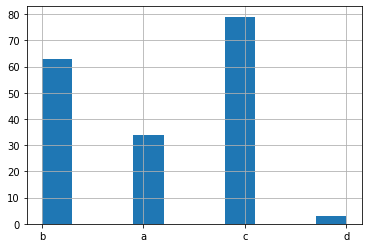

In [23]:
df[df['D'].str.contains('None')].Answer.hist()

In [24]:
none = df[df['D'].str.contains('None')]
none[none['Answer'] == "d"]

,question,A,B,C,D,Answer
120,"In a GSM-1800 Band, what is the duplex spacin...",75MHz,85MHz,95MHz,None,d
140,Choose a Common Control Channel below.,PCH (paging Channel),AGCH (Access Grant Channel),RACH (Random Access Channel),None,d
241,What is the modulation technique used by WCDM...,Amplitude Modulation,Separate Spectrum Modulation,Spread Spectrum Modulation,None,d


<AxesSubplot:>

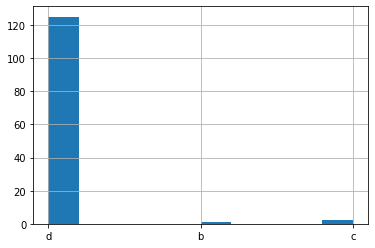

In [25]:
df[df['D'].str.contains('All')].Answer.hist()

In [27]:
df[df['D'].str.contains('All')].query('Answer != "d"')

,question,A,B,C,D,Answer
300,Which among the following is a Static Database?,VLR (Visitor Location Register),HLR (Home Location Register),AuC (Authentication Center),All,b
464,What is the other name for GAN network?,Virtual Network Access (VMA),Licensed Mobile Access (LMA),Unlicensed Mobile Access (UMA),All,c
476,"To support VoWi-Fi, mobile phones have to con...",3GPP R8,3GPP R9,3GPP R10,All,c


<AxesSubplot:>

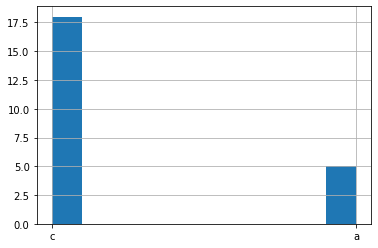

In [28]:
df[df['C'].str.contains('Both')].Answer.hist()

In [29]:
both = df[df['C'].str.contains('Both')]
both[both['Answer'] == "a"]

,question,A,B,C,D,Answer
59,"Between VLR and HLR, which one is used mostly...",VLR,HLR,Both are used equally,None,a
369,A CDMA2000 1x network offers data services th...,Circuit Switching,Packet Switching,Both Circuit Switching and Packet Switching,None,a
401,EVDO implements Time Division Multiplexing fo...,Forward Link,Reverse Link,Both Forward and Reverse Links,None,a
406,A Virtual Soft Handoff in a 1xEVDO system wor...,Forward,Reverse,Both Forward and Reverse,None,a
469,A GERAN-Only network mode supports ___ network.,Cellular Only,Wi-Fi only,Both Cellular and WiFi,None,a


<AxesSubplot:>

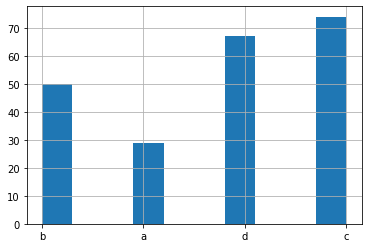

In [20]:
df.Answer.hist() # old df contains 2g only 

<AxesSubplot:>

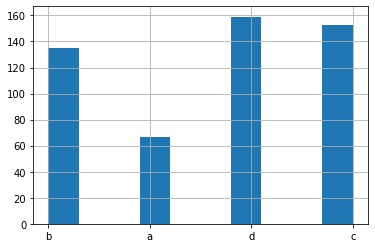

In [30]:
df.Answer.hist()

## analysis for questions doesn't match with previous conditions
### (all the above) || (both ) || ( none )

In [43]:
newdf = df

In [37]:
none_index = list(df[df['D'].str.contains('None')].index)
both_index = list(df[df['C'].str.contains('Both')].index)
all_index = list(df[df['D'].str.contains('All')].index) + both_index + none_index

In [39]:
len(all_index),len(none_index),len(both_index)

(330, 179, 23)

In [40]:
all_index = list(dict.fromkeys(all_index))
len(all_index)

308

In [45]:
newdf.drop(index=all_index, axis=0, inplace=True)

<AxesSubplot:>

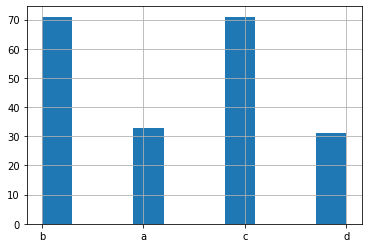

In [46]:
newdf.Answer.hist()

In [50]:
generate_txt(df,'examtray')